# Figure 2 and 2S (supplemental) panels

In [1]:
import re
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image
import utils.fig_utils as fig_utils

In [2]:
import importlib

%load_ext autoreload
%autoreload 2

In [3]:
from utils.fig2_utils import *

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [4]:
# Set the directory for where to save figures, create the directory if it doesn't exist
fig_outdir = "figures"
data_dir = '../data/'
Path(fig_outdir).mkdir(parents=True, exist_ok=True)

# Data

In [5]:
# Download data.
fig_utils.download_data(data_dir + 'round2_codons_merged.csv', fig_utils.urls['round2_codons_merged.csv'])
fig_utils.download_data(data_dir + 'round2_codons_separate.csv', fig_utils.urls['round2_codons_separate.csv'])
fig_utils.download_data(data_dir + 'SVAE_SM_library_references_only.csv', fig_utils.urls['SVAE_SM_library_references_only.csv'])

Already have ../data/round2_codons_merged.csv skipping download.
Already have ../data/round2_codons_separate.csv skipping download.
Already have ../data/SVAE_SM_library_references_only.csv skipping download.


## Round 2 library, pulldown and in vivo assays, codon replicates aggregated

In [6]:
r2_df = pd.read_csv(data_dir + "round2_codons_merged.csv")
r2_df

/Users/barrya/.virtualenvs/pulldown/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,AA_sequence,SOURCE,reference,reference_sequence,4,5,6,7,DNA_1_RPM,DNA_2_RPM,...,F1-BalbC-B_log2enr,F2-BalbC-B_log2enr,M1-BalbC-B_log2enr,M2-BalbC-B_log2enr,F1-C57-B_log2enr,M1-C57-B_log2enr,M2-C57-B_log2enr,BALB/c_log2enr,C57BL/6_log2enr,log2fitness
0,*AGSMMV,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,12.860694,11.726311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.459701
1,*AKQGAQ,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,11.145935,11.275300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.780696
2,*AWYIIG,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,11.788970,10.598782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.779192
3,*CGCWAS,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,11.360280,11.275300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.243019
4,*CNQNIP,STOP,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,5.787312,8.118216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24974,YYLPEGG,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,12.324832,11.049794,...,NaN,NaN,NaN,NaN,NaN,-3.038558,NaN,NaN,-4.623521,-0.238538
24975,YYLPNGD,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,8.680969,7.441698,...,NaN,NaN,NaN,NaN,NaN,2.221164,NaN,NaN,0.636201,-1.391864
24976,YYPGYWE,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,11.788970,7.554451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.444388
24977,YYRGDSS,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,9.431176,11.275300,...,NaN,NaN,NaN,NaN,-0.419874,NaN,NaN,NaN,-2.004836,-0.054229


## Round 2 library, pulldown and in vivo assays, codon replicates separate

For Fig 2S2 (Codon replicates)

In [7]:
r2_df_sep = pd.read_csv(data_dir + "/round2_codons_separate.csv")
r2_df_sep

/Users/barrya/.virtualenvs/pulldown/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,AA_sequence,SOURCE,reference,reference_sequence,invivo_source,5,6,7,8,9,...,F1-BalbC-B_log2enr,F2-BalbC-B_log2enr,M1-BalbC-B_log2enr,M2-BalbC-B_log2enr,F1-C57-B_log2enr,M1-C57-B_log2enr,M2-C57-B_log2enr,152,153,154
0,SLVGNRW,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SLVGNRW,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RAVGNSW,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RAVGNSW,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-3.928529,1.243165,NaN,NaN,NaN,NaN
4,LATSRWD,LY6C1,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50135,RGNRGTEWDAQ,Reference,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50136,QRGNRGTEWDAQ,Reference,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50137,QRGNRGTEWDAQ,Reference,AAV9_588_7mer_NNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50138,SAQAQAQ,Reference,AAV9_WT_SAQAQAQ,AAV9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.324596,-3.071646,2.218545,NaN,NaN,NaN


## SVAE + saturation mutagenesis library, reference sequences

For Fig 2F (Published reference sequences)

In [8]:
ss_refs_df = pd.read_csv(data_dir + "/SVAE_SM_library_references_only.csv")
ss_refs_df

,sequence,full_AA_sequence,AA_pre,3,AA_sequence,5,Source,7,reference,9,...,136,137,138,139,140,141,142,143,144,145
0,TCAGCACAAACCACAGAAAAGCCCTGGCTCGCACAAGCCCAG,SAQTTEKPWLAQAQ,SAQ,NaN,TTEKPWL,NaN,9P03,NaN,AAV9_588_SAQ_7mer_AQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGGCTCAGACAACGGAGAAACCATGGTTGGCTCAGGCTCAA,SAQTTEKPWLAQAQ,SAQ,NaN,TTEKPWL,NaN,9P03,NaN,AAV9_588_SAQ_7mer_AQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGGCACAGACGACTGAGAAGCCTTGGCTTGCTCAAGCTCAA,SAQTTEKPWLAQAQ,SAQ,NaN,TTEKPWL,NaN,9P03,NaN,AAV9_588_SAQ_7mer_AQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGTGCGCAAACCACGGAAAAACCCTGGTTAGCACAGGCGCAG,SAQTTEKPWLAQAQ,SAQ,NaN,TTEKPWL,NaN,9P03,NaN,AAV9_588_SAQ_7mer_AQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGTGATGGGACCCTCTCACAGCCCTTCAGAGCCCAAGCACAA,SDGTLSQPFRAQAQ,SDG,NaN,TLSQPFR,NaN,9P08,NaN,AAV9_588_SAQ_7mer_AQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,AGTGCCCAAGCTCAAGCACAA,SAQAQAQ,SAQ,NaN,NaN,NaN,WT,NaN,AAV9_WT_SAQAQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,AGTGCCCAAGCCCAGGCCCAG,SAQAQAQ,SAQ,NaN,NaN,NaN,WT,NaN,AAV9_WT_SAQAQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,AGTGCCCAAGCTCAGGCGCAA,SAQAQAQ,SAQ,NaN,NaN,NaN,WT,NaN,AAV9_WT_SAQAQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,AGTGCCCAAGCCCAAGCCCAA,SAQAQAQ,SAQ,NaN,NaN,NaN,WT,NaN,AAV9_WT_SAQAQAQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Fig 2A (bar plot) - Round 2 library composition by Round 1 source

['17.9% (8.9 k)', '5.6% (2.8 k)', '50.8% (25.3 k)', '25.6% (12.8 k)']


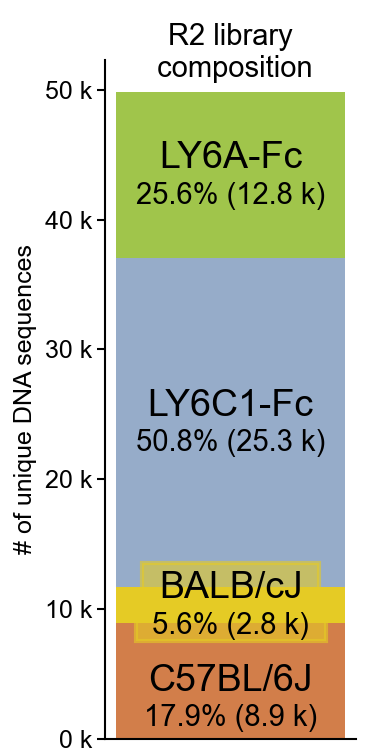

In [9]:
figname = "fig2A_bar"
png_path = R2_library_composition_bar(r2_df_sep, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 2B - Round 2 performance by source

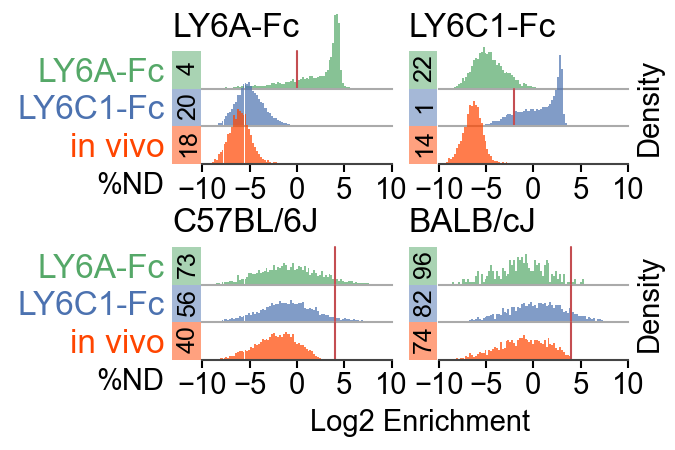

In [10]:
figname = "fig2B"
png_path = sources_histogram(r2_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 2C - Counts table

In [11]:
print_counts(
    r2_df
)  # See definition of print_counts() in fig2_utils.py for filter definitions

LY6A
All:              n = 6289
in vitro filter:  n = 4822
C57BL/6J:         n = 117
BALB/cJ:          n = 2

LY6C1
All:              n = 12499
in vitro filter:  n = 10345
C57BL/6J:         n = 333
BALB/cJ:          n = 239

Mouse in vivo
All:              n = 5843
in vitro filter:  n = N/A
C57BL/6J:         n = 2
BALB/cJ:          n = 4


# Fig 2D - Rankplot heatmap

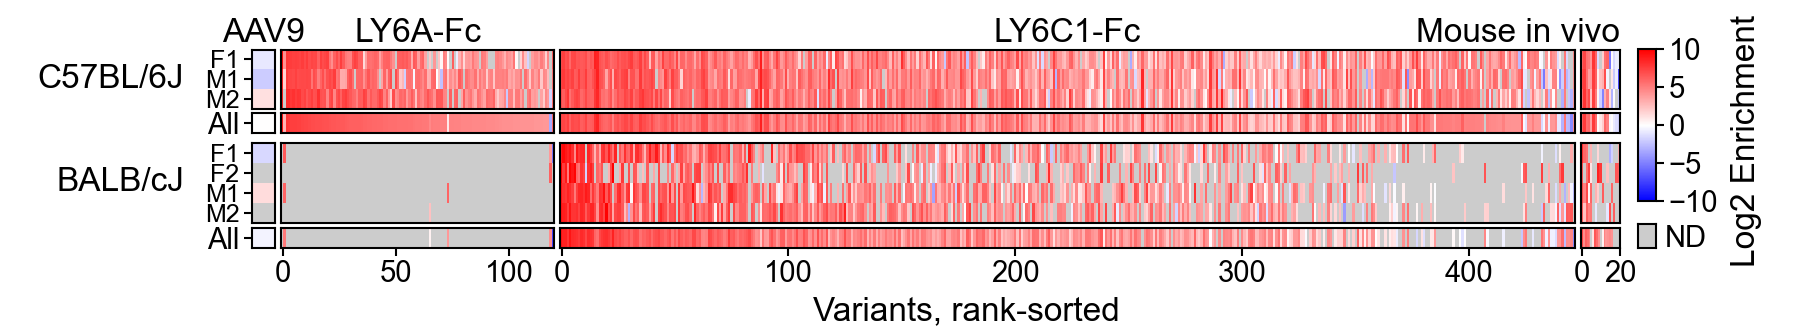

In [12]:
figname = "fig2D"
png_path, r2_dff = rankplot_heatmap(r2_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 2E - Rankplots

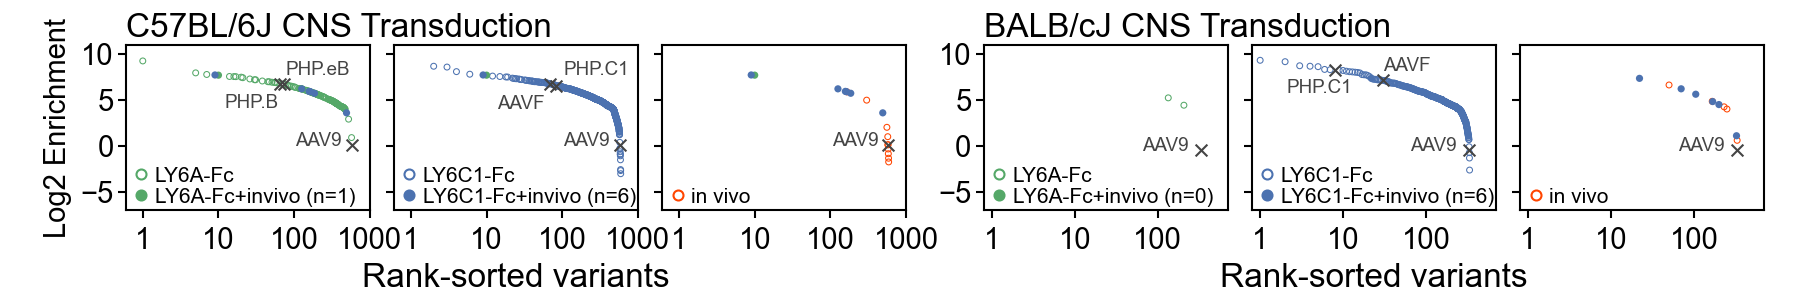

In [13]:
figname = "fig2E"
png_path, r2_dff_rankplot, r2_dff_animal = rankplots(
    r2_dff, fig_outdir=fig_outdir, figname=figname
)
Image(png_path)

# Fig 2F - Published reference sequences
**Note:** Some sequences may have codon replicate columns ordered differently than in paper figure.

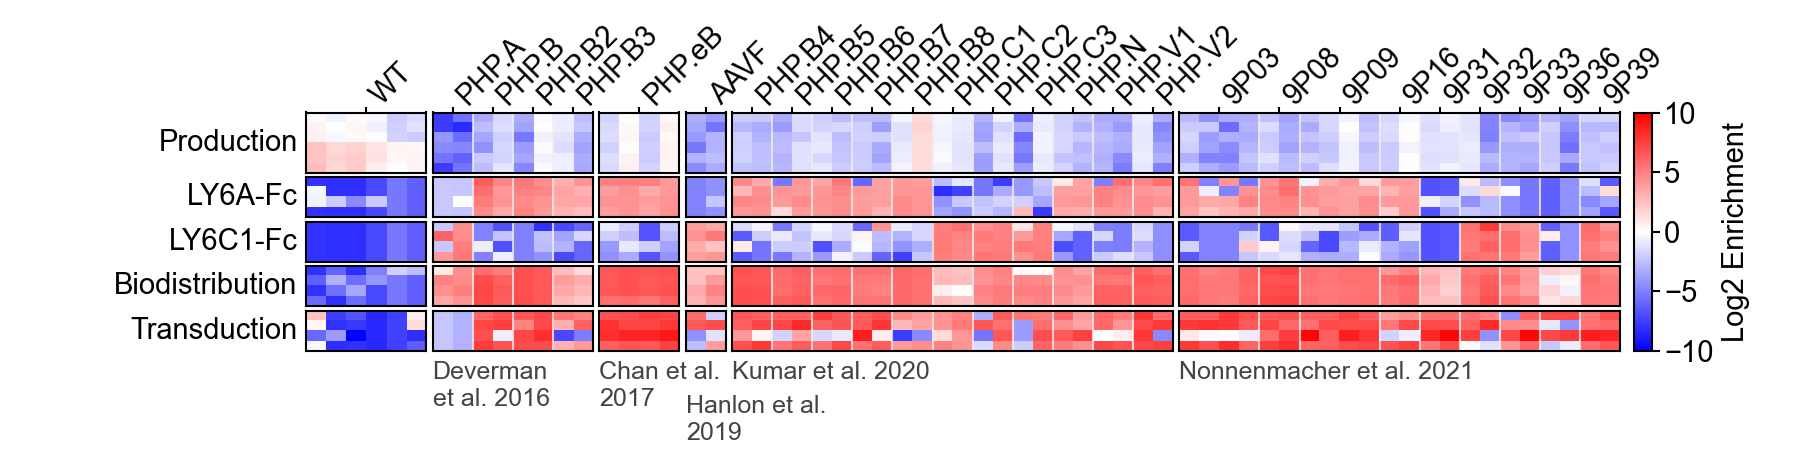

In [14]:
figname = "fig2F"
png_path, ss_refs_df, label_df = plot_published_variants(
    ss_refs_df, fig_outdir=fig_outdir, figname=figname
)
Image(png_path)

# Fig 2S1 - Replicability

## Fig 2S1A-E - Replicability (Round 2 pulldown)

/Users/barrya/.virtualenvs/pulldown/lib/python3.9/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


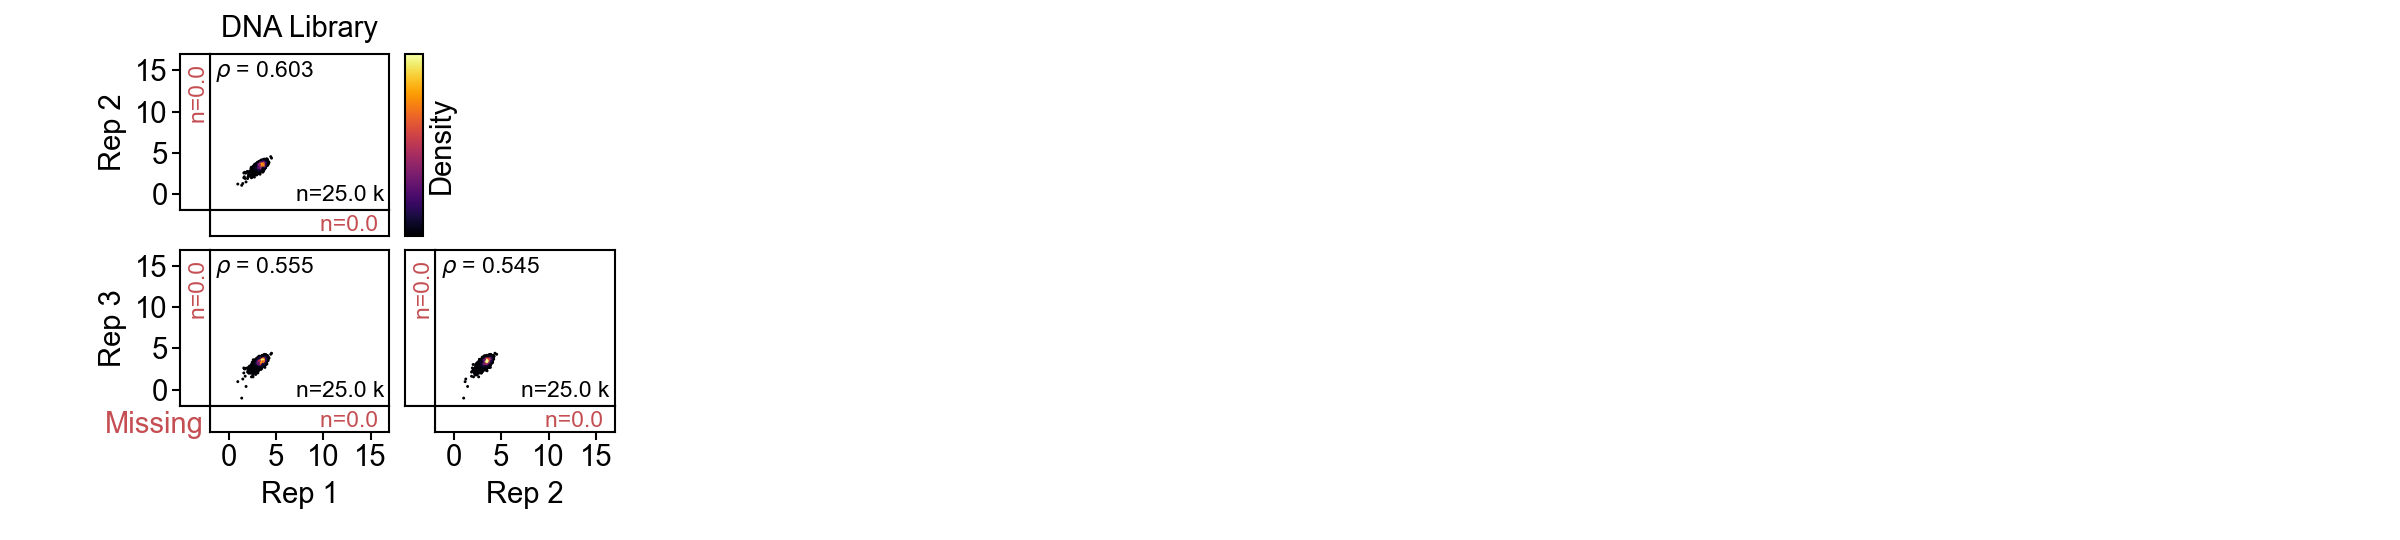

In [15]:
figname = "fig2S1A"
assays = ["DNA"]
assay_titles = ["DNA Library"]
png_path = plot_r2_replicability_pulldown(
    r2_df,
    assays=assays,
    assay_titles=assay_titles,
    fig_outdir=fig_outdir,
    figname=figname,
)
Image(png_path)

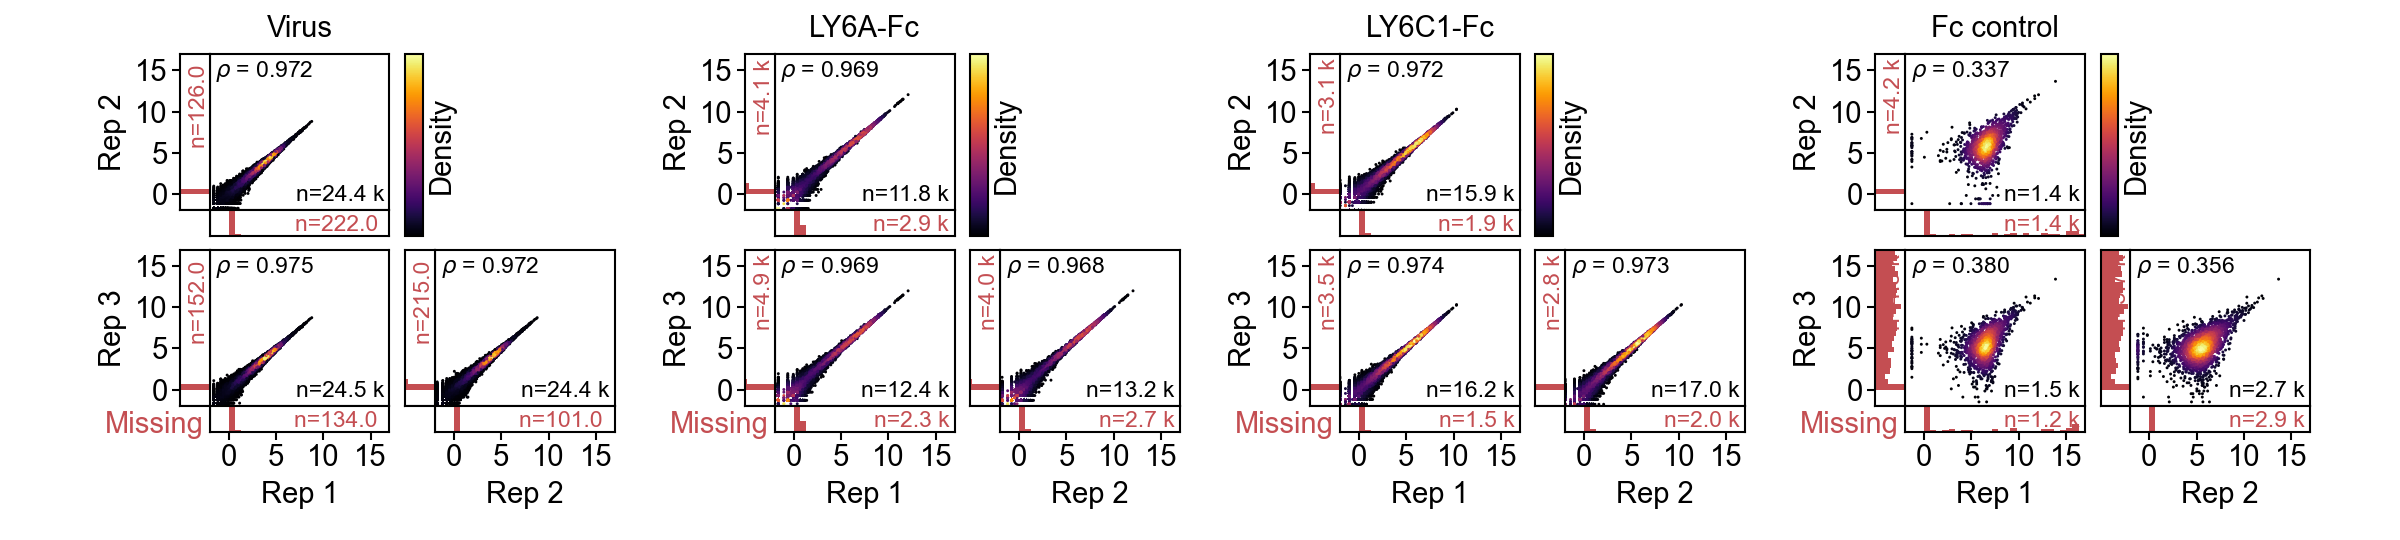

In [16]:
figname = "fig2S1BCDE"
assays = ["starter_virus", "LY6A", "LY6C1", "Fc"]
assay_titles = ["Virus", "LY6A-Fc", "LY6C1-Fc", "Fc control"]
png_path = plot_r2_replicability_pulldown(
    r2_df,
    assays=assays,
    assay_titles=assay_titles,
    fig_outdir=fig_outdir,
    figname=figname,
)
Image(png_path)

## Fig 2S1F - Replicability (Round 2 in vivo, BALB/cJ)

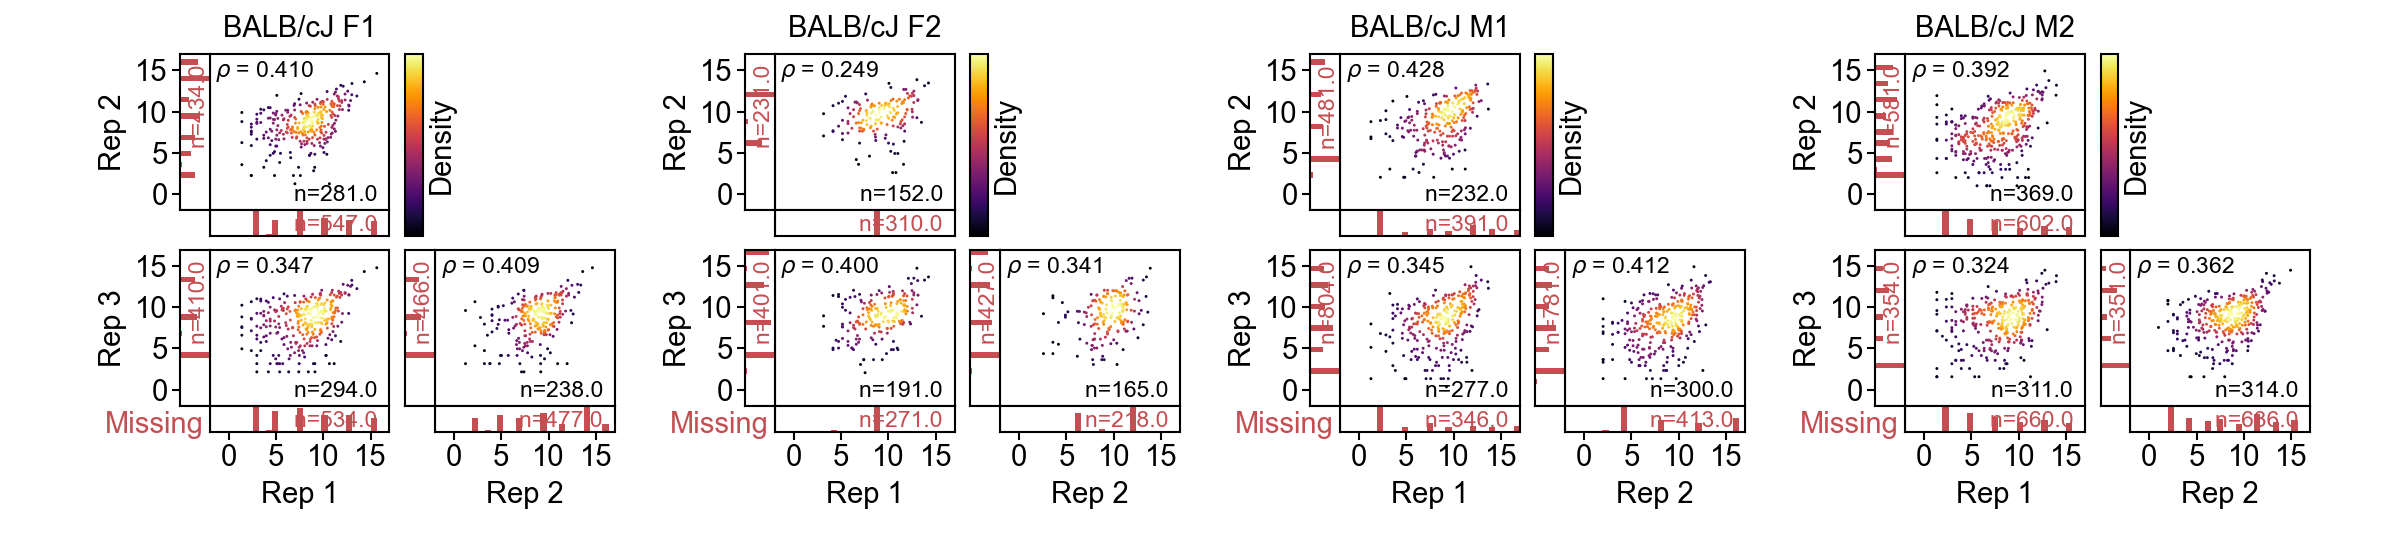

In [17]:
figname = "fig2S1F"
assays = ["F1-BalbC-B", "F2-BalbC-B", "M1-BalbC-B", "M2-BalbC-B"]
assay_titles = ["BALB/cJ F1", "BALB/cJ F2", "BALB/cJ M1", "BALB/cJ M2"]
png_path = plot_r2_replicability_invivo(
    r2_df,
    assays=assays,
    assay_titles=assay_titles,
    fig_outdir=fig_outdir,
    figname=figname,
)
Image(png_path)

## Fig 2S1G - Replicability (Round 2 in vivo, C57BL/6J)

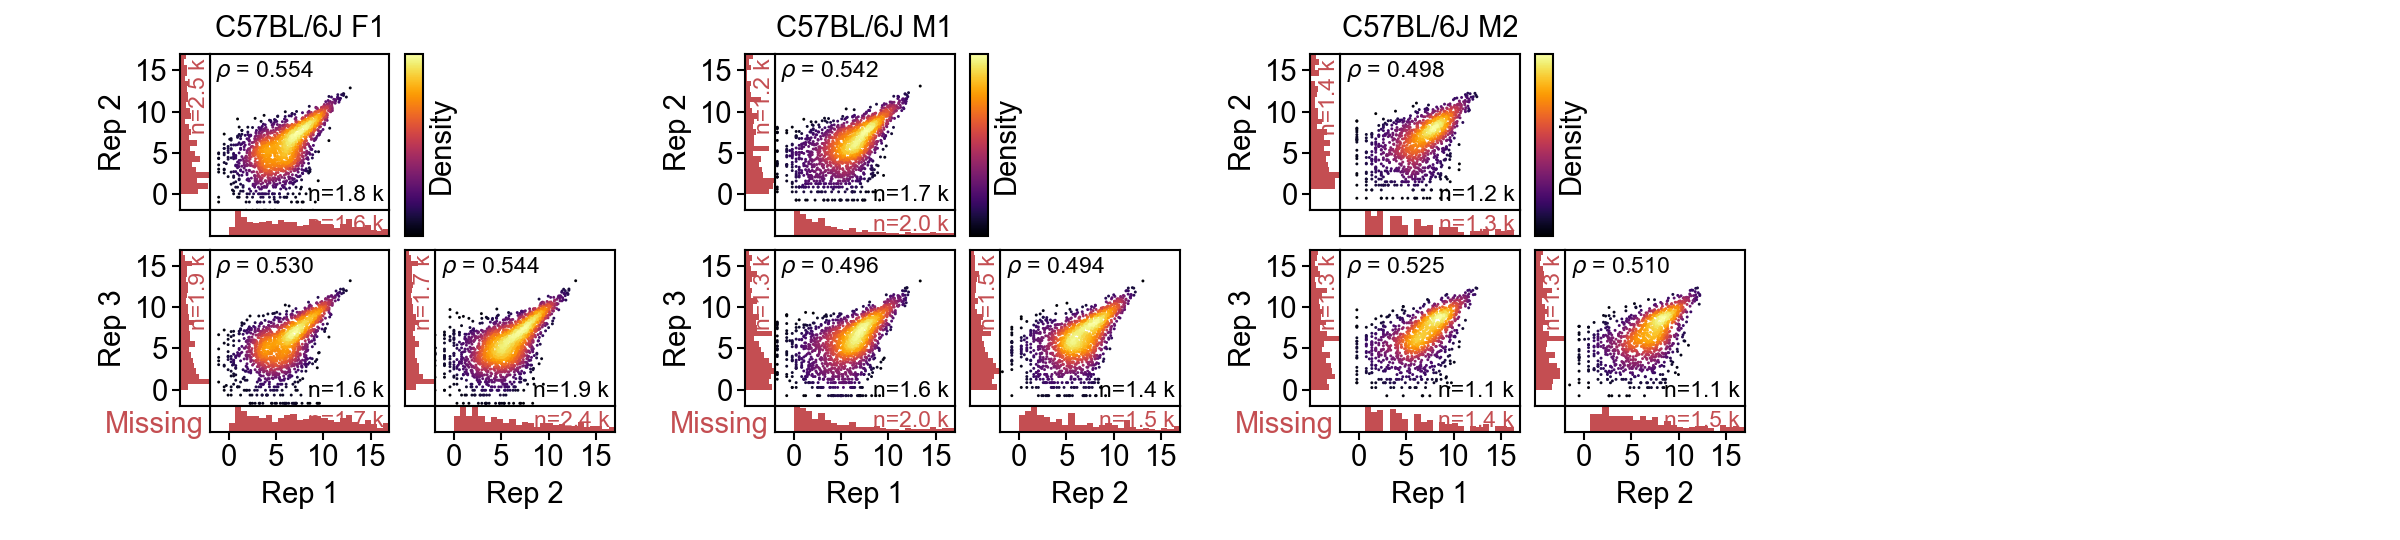

In [18]:
figname = "fig2S1G"
assays = ["F1-C57-B", "M1-C57-B", "M2-C57-B"]
assay_titles = ["C57BL/6J F1", "C57BL/6J M1", "C57BL/6J M2"]
png_path = plot_r2_replicability_invivo(
    r2_df,
    assays=assays,
    assay_titles=assay_titles,
    fig_outdir=fig_outdir,
    figname=figname,
)
Image(png_path)

## Fig 2S1H,I - Replicability (Round 2 in vivo, BALB/cJ between animals)

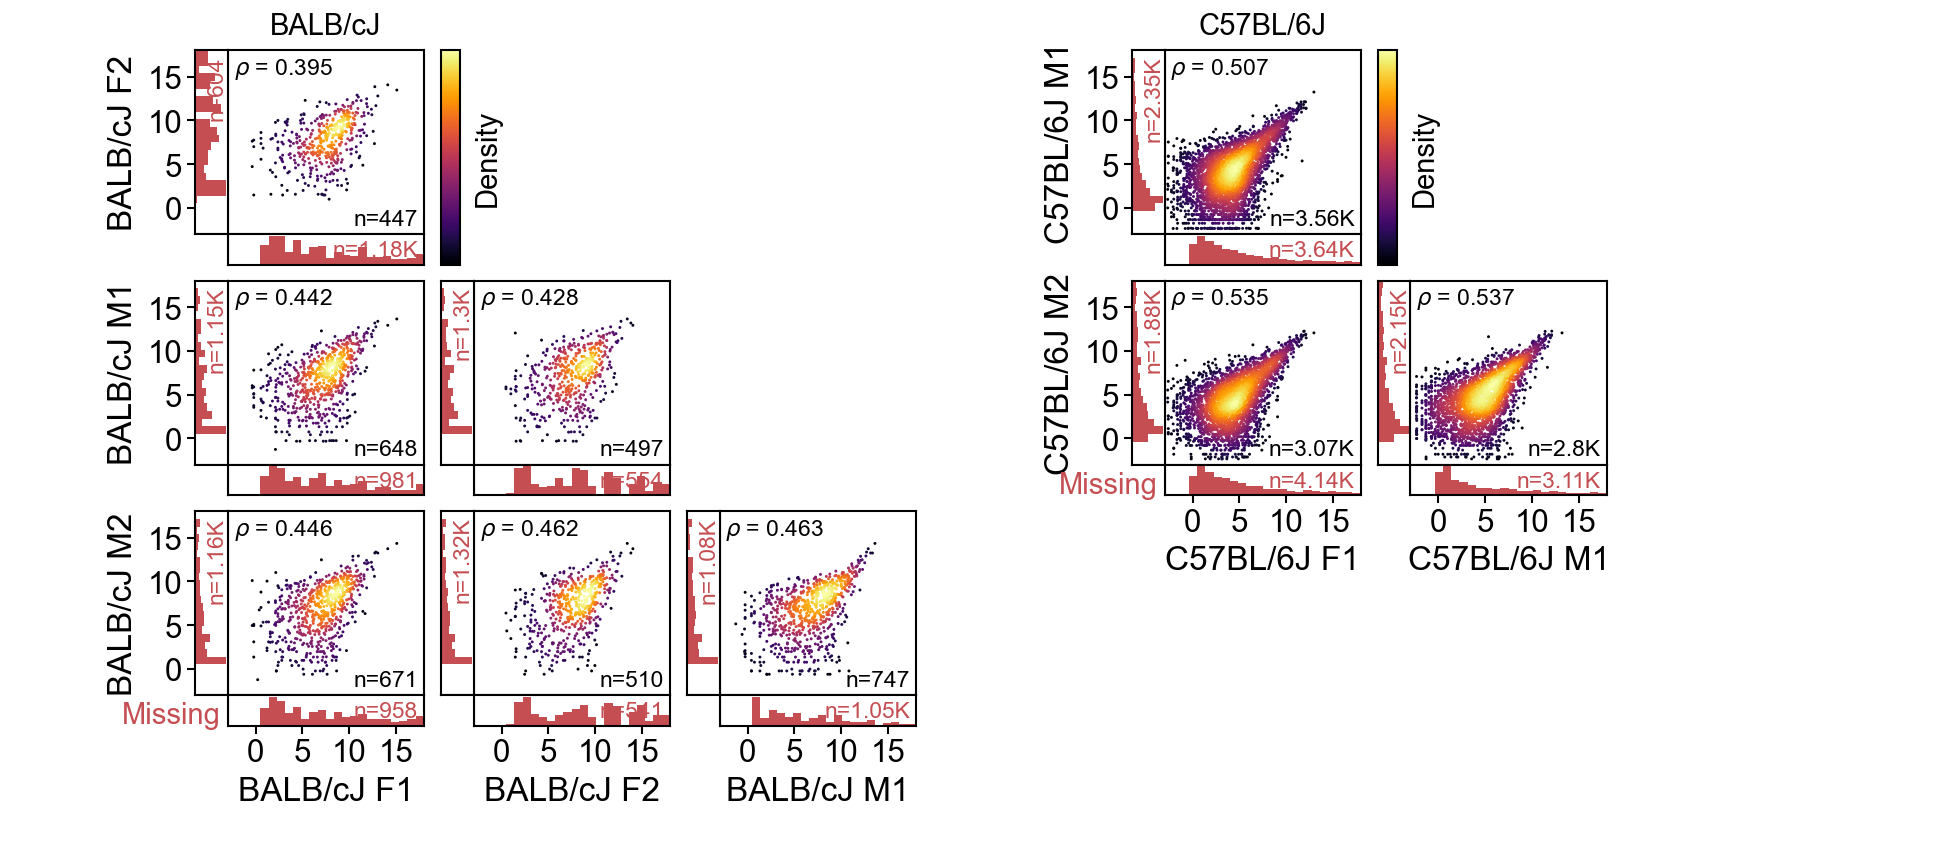

In [19]:
figname = "fig2S1HI"
assays = ["BalbC-B", "C57-B"]
assay_titles = ["BALB/cJ", "C57BL/6J"]
png_path = plot_r2_replicability_animals(
    r2_df,
    assays=assays,
    assay_titles=assay_titles,
    fig_outdir=fig_outdir,
    figname=figname,
)
Image(png_path)

# Fig 2S2 - Codon Replicability (Round 2)

In [20]:
r2_assays = [
    "starter_virus",
    "LY6A",
    "LY6C1",
    "Fc",
    "F1-BalbC-B",
    "F2-BalbC-B",
    "M1-BalbC-B",
    "M2-BalbC-B",
    "F1-C57-B",
    "M1-C57-B",
    "M2-C57-B",
]

r2_assay_titles = [
    "Virus",
    "LY6A-Fc",
    "LY6C1-Fc",
    "Fc control",
    "BALB/cJ F1",
    "BALB/cJ F2",
    "BALB/cJ M1",
    "BALB/cJ M2",
    "C57BL/6J F1",
    "C57BL/6J M1",
    "C57BL/6J M2",
]

/Users/barrya/.virtualenvs/pulldown/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


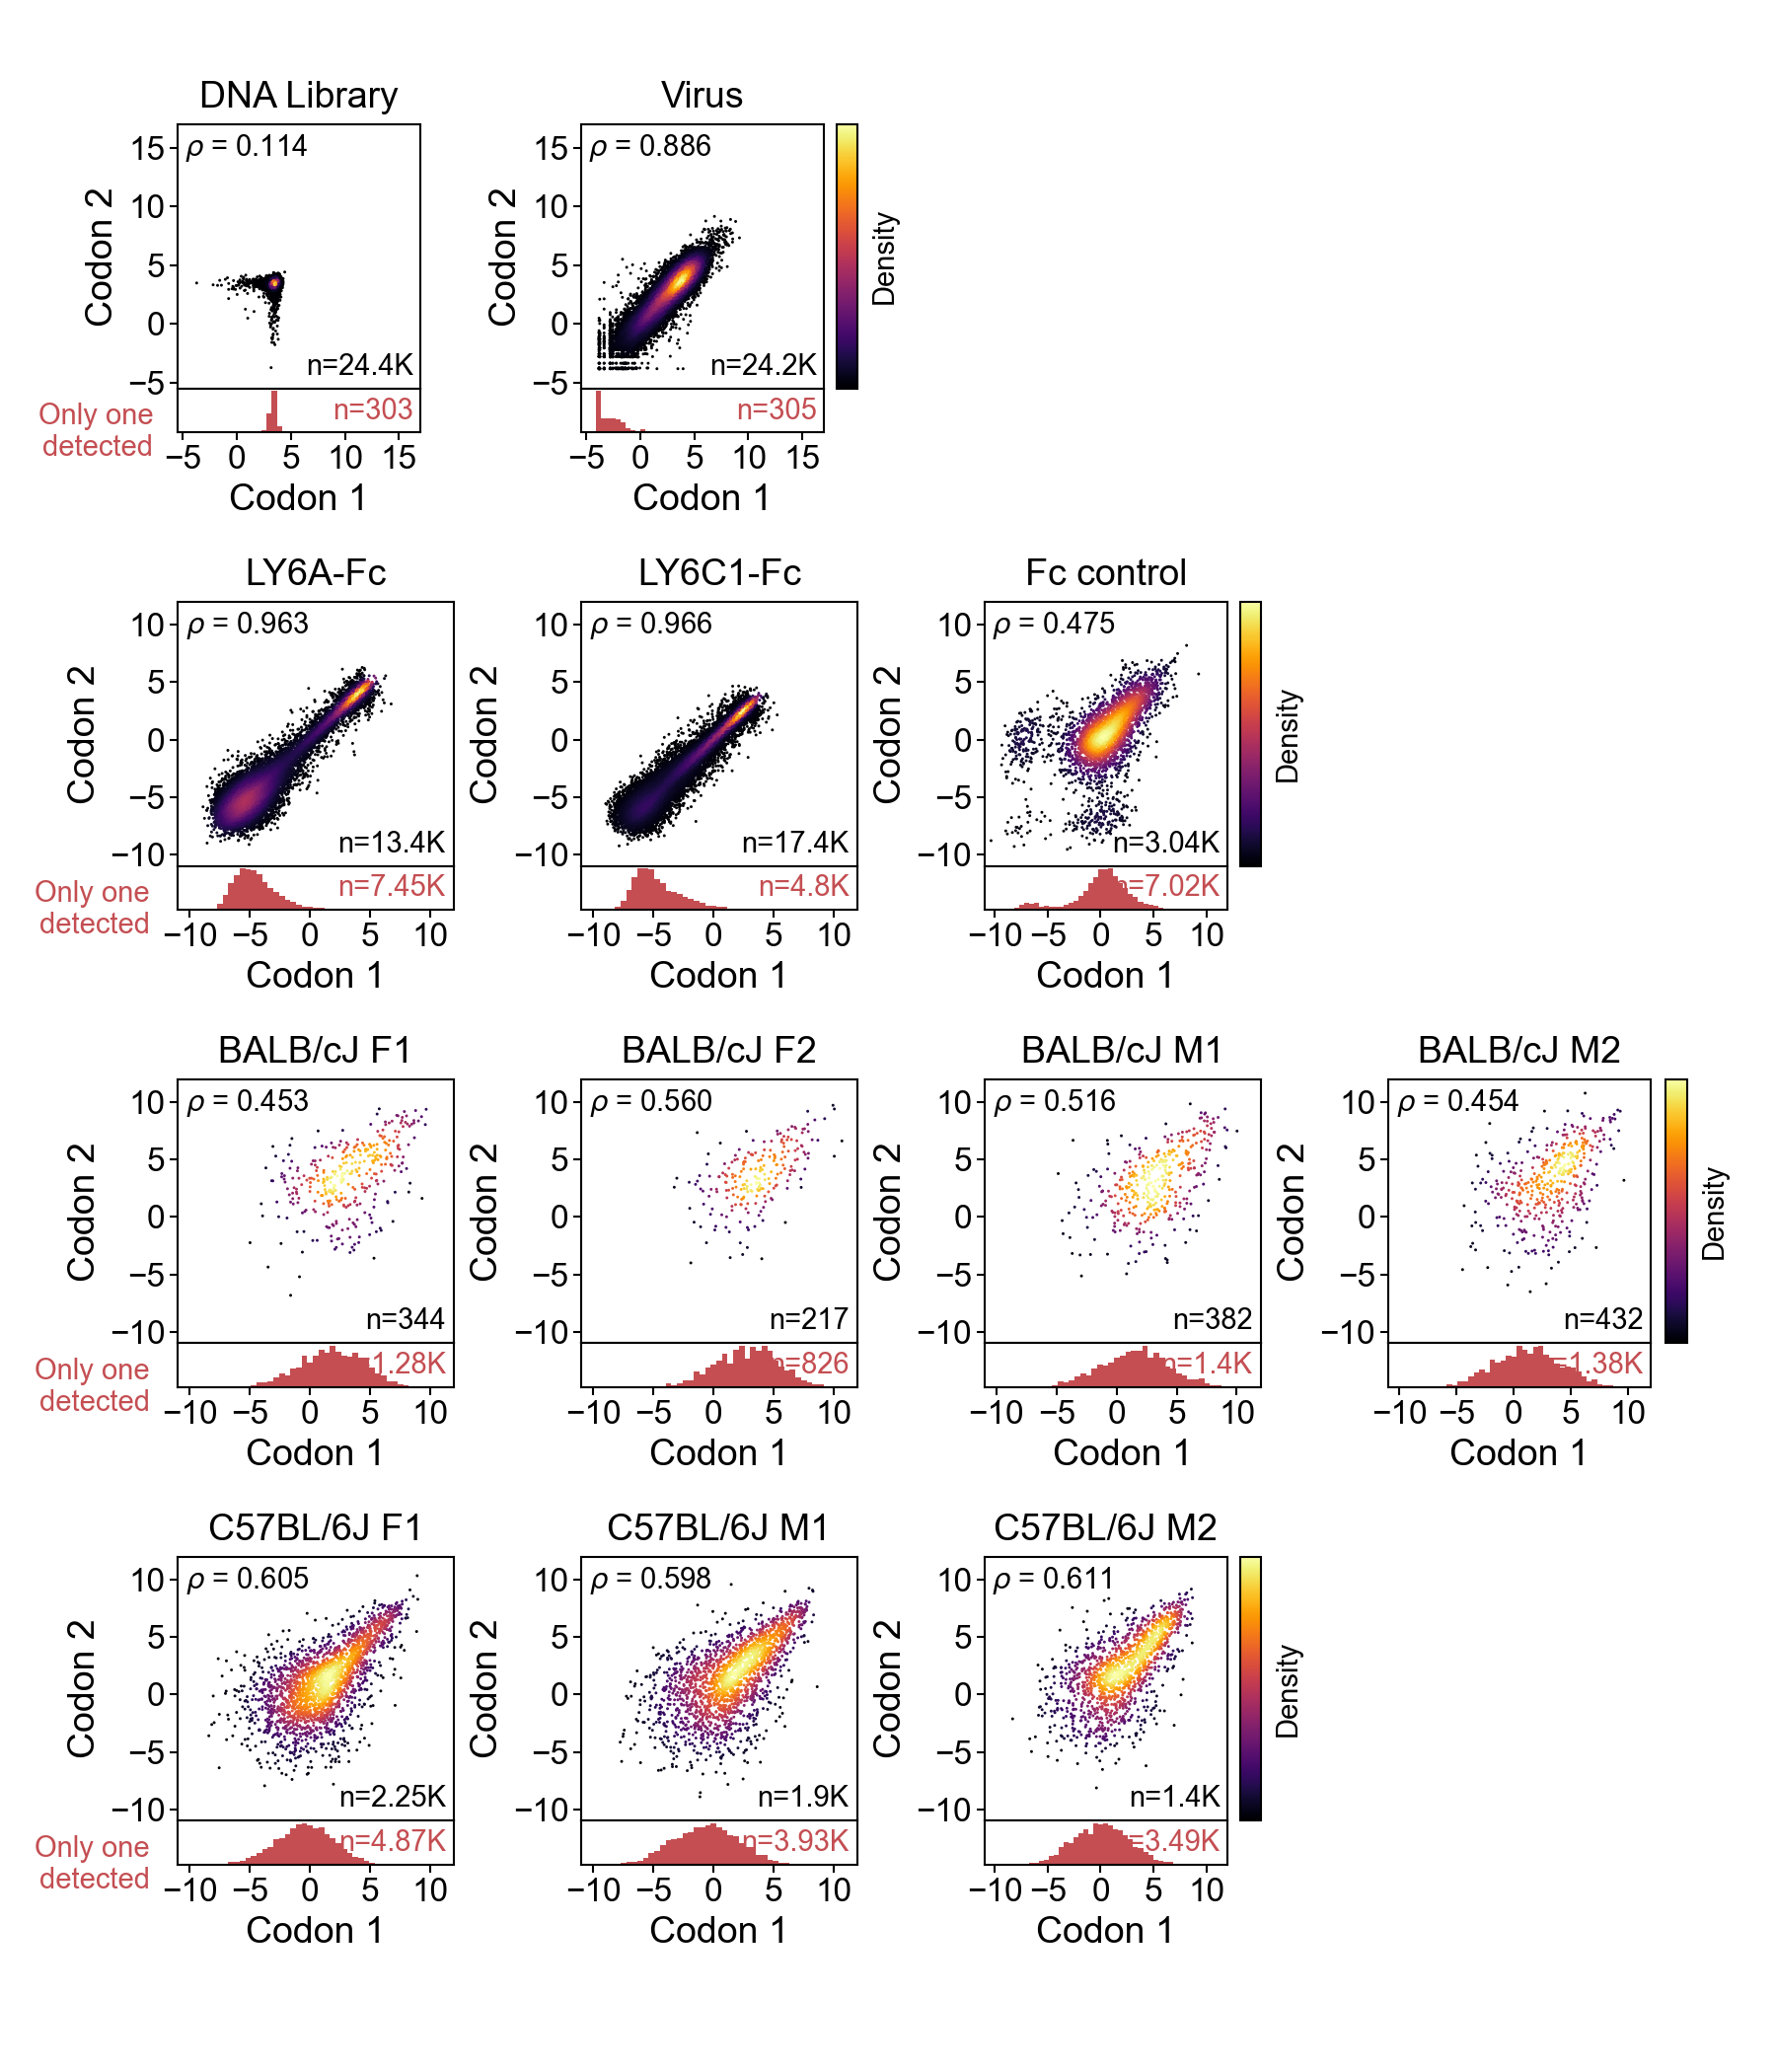

In [21]:
figname = "fig2S2"
assays = r2_assays
assay_titles = r2_assay_titles
png_path = plot_codon_replicability(
    r2_df_sep,
    assays=assays,
    assay_titles=assay_titles,
    fig_outdir=fig_outdir,
    figname=figname,
)
Image(png_path)

# Fig 2S3 - BI30-like motif

## Fig 2S3A - Round 2 variants identified in Round 1 in vivo, filtered for low pulldown binding

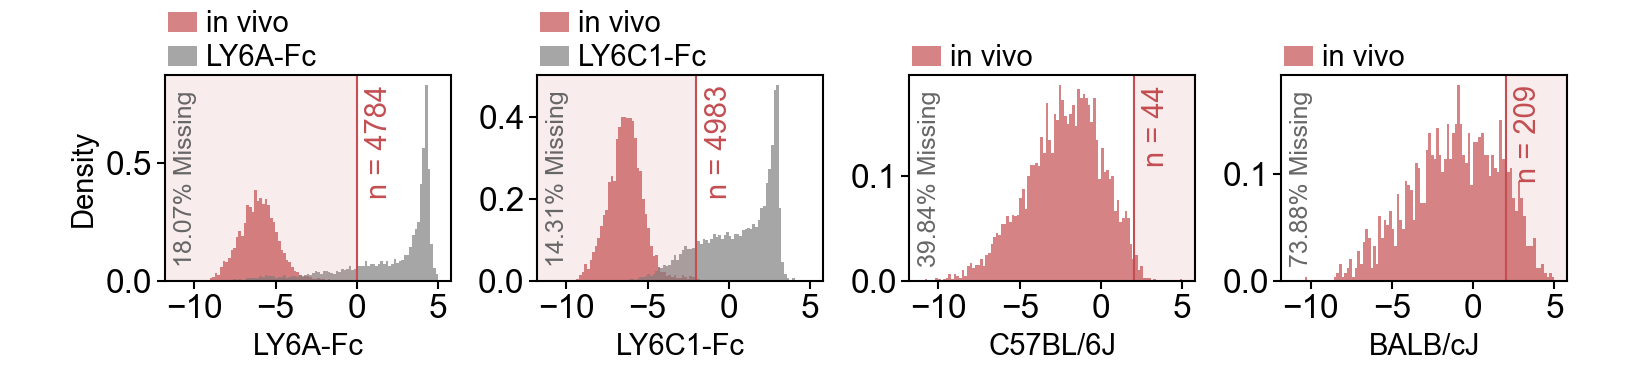

In [22]:
figname = "fig2S3A_hist_thresholds"

png_path = histogram_thresholding(r2_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 2S3B,C - Hierarchical clustering and Round 2 enrichment heatmap

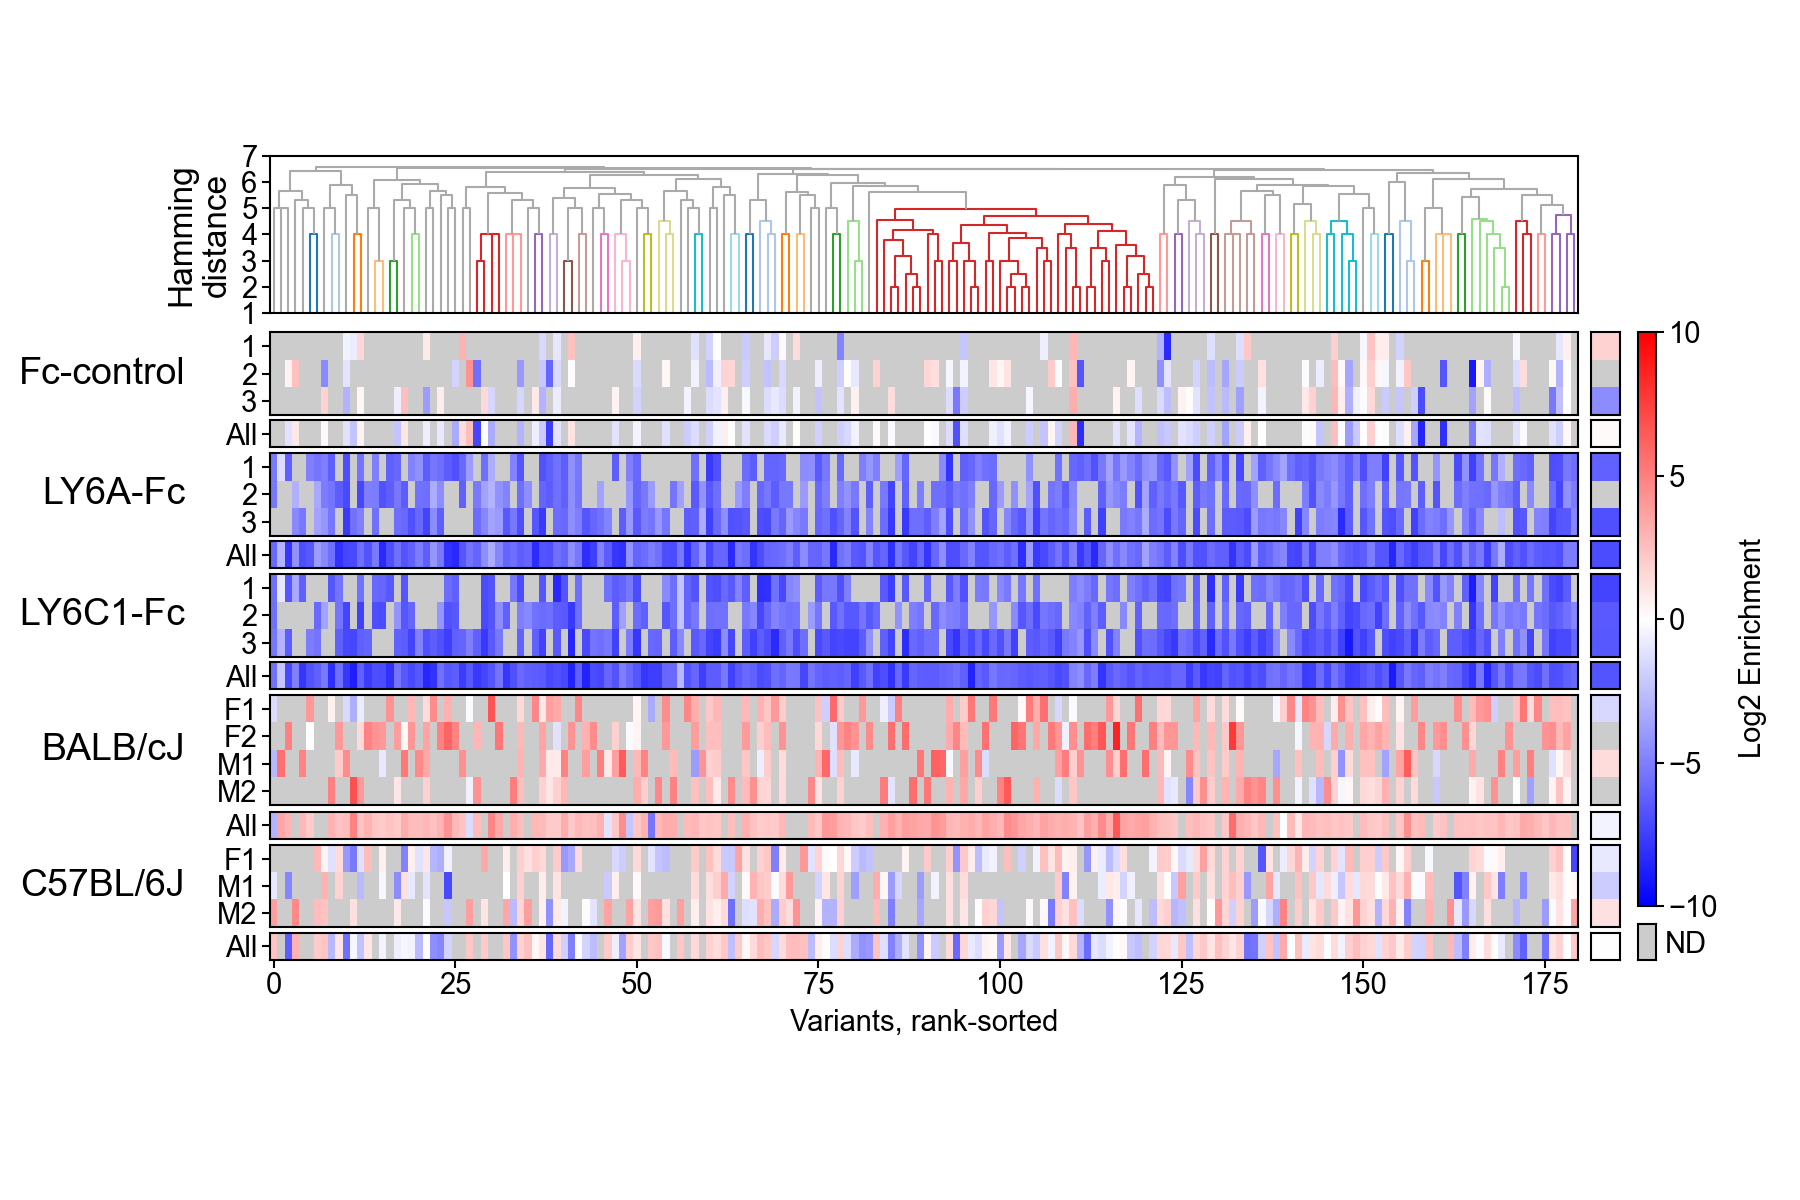

In [23]:
figname = "fig2S3BC"

png_path, dff_heatmap = hierarchical_clustering_heatmap(
    r2_df, fig_outdir=fig_outdir, figname=figname
)
Image(png_path)

## Fig 2S3D - BI30-like cluster motif logo

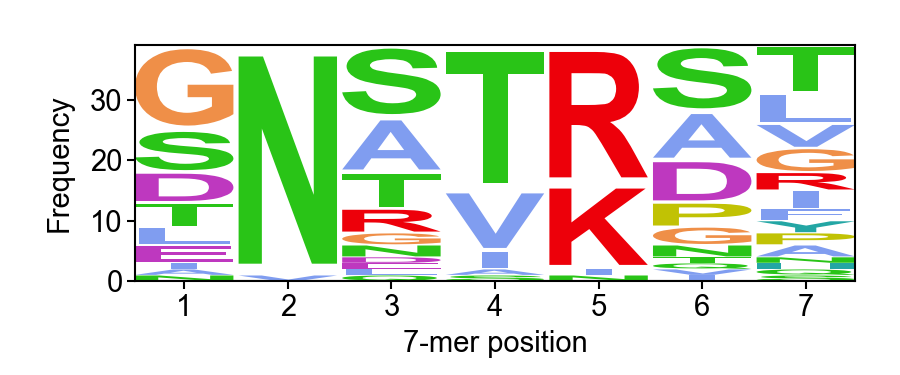

In [24]:
figname = "fig2S3D"

png_path = bi30_logo(dff_heatmap, fig_outdir=fig_outdir, figname=figname)
Image(png_path)